In [1]:
import COVID19Py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
from datetime import datetime
from datetime import timedelta  

In [2]:
covid19 = COVID19Py.COVID19()

In [3]:
latest = covid19.getLatest()

In [4]:
def normatize_cases_by_absolute_day(df):
    
    days = []
    cases = []
    dates = []
    deaths = []
    recovereds = []
    contagious = []
    current_day = 0
    
    for i in range(df.shape[0]):
        if df.iloc[i].Cases > 0:
            current_day = current_day+1
            days.append(current_day)
            cases.append(df.iloc[i].Cases)
            datetime_object = datetime.strptime(str(df.iloc[i].Date), '%Y-%m-%dT%H:%M:%SZ')
            dates.append(datetime_object)
            deaths.append(df.iloc[i].Deaths)
            recovereds.append(df.iloc[i].Recovered)
            contagious.append(df.iloc[i].Contagious)
    df = pd.DataFrame({"Date":dates, "Day":days, "Cases": cases, "Deaths": deaths, "Recovered": recovereds, "Contagious": contagious})
    return df

def contagious_dataframe(df):
    contagious_list = []
    for x in range(df.shape[0]):
        if x == 0:
            contagious_list.append(0)
        if (x+1) < df.shape[0]:
            cases_sub = df.iloc[(x+1)].Cases - df.iloc[x].Cases
            contagious_list.append(cases_sub)
    df = pd.DataFrame({'Contagious': contagious_list})
    return df 


In [5]:
dfBrazilConfirmedRaw = pd.DataFrame(covid19.getLocationByCountryCode("BR", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases'])
dfJapanConfirmedRaw = pd.DataFrame(covid19.getLocationByCountryCode("JP", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases'])
dfChinaConfirmedRaw = pd.DataFrame(covid19.getLocationByCountryCode("CN", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases'])
dfSouthKoreaConfirmedRaw = pd.DataFrame(covid19.getLocationByCountryCode("KR", timelines=True)[0]['timelines']['confirmed']['timeline'].items(), columns=['Date', 'Cases'])

dfBrazilDeathsRaw = pd.DataFrame(covid19.getLocationByCountryCode("BR", timelines=True)[0]['timelines']['deaths']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfJapanDeathsRaw = pd.DataFrame(covid19.getLocationByCountryCode("JP", timelines=True)[0]['timelines']['deaths']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfChinaDeathsRaw = pd.DataFrame(covid19.getLocationByCountryCode("CN", timelines=True)[0]['timelines']['deaths']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfSouthKoreaDeathsRaw = pd.DataFrame(covid19.getLocationByCountryCode("KR", timelines=True)[0]['timelines']['deaths']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)

dfBrazilRecoveredRaw = pd.DataFrame(covid19.getLocationByCountryCode("BR", timelines=True)[0]['timelines']['recovered']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfJapanRecoveredRaw = pd.DataFrame(covid19.getLocationByCountryCode("JP", timelines=True)[0]['timelines']['recovered']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfChinaRecoveredRaw = pd.DataFrame(covid19.getLocationByCountryCode("CN", timelines=True)[0]['timelines']['recovered']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)
dfSouthKoreaRecoveredRaw = pd.DataFrame(covid19.getLocationByCountryCode("KR", timelines=True)[0]['timelines']['recovered']['timeline'].items(), columns=['Date', 'Cases']).drop(["Date"], axis=1)

dfBrazilContagiousRaw = contagious_dataframe(dfBrazilConfirmedRaw)
dfJapanContagiousRaw = contagious_dataframe(dfJapanConfirmedRaw)
dfChinaContagiousRaw = contagious_dataframe(dfChinaConfirmedRaw)
dfSouthKoreaContagiousRaw = contagious_dataframe(dfSouthKoreaConfirmedRaw)

In [6]:
dfBrazilRaw = pd.concat(
    [dfBrazilConfirmedRaw,dfBrazilDeathsRaw, dfBrazilRecoveredRaw, dfBrazilContagiousRaw], 
    ignore_index=True, 
    axis=1, 
    join="inner"
)
dfJapanRaw = pd.concat(
    [dfJapanConfirmedRaw,dfJapanDeathsRaw, dfJapanRecoveredRaw, dfJapanContagiousRaw], 
    ignore_index=True, 
    axis=1, 
    join="inner"
)
dfChinaRaw = pd.concat(
    [dfChinaConfirmedRaw,dfChinaDeathsRaw, dfChinaRecoveredRaw, dfChinaContagiousRaw], 
    ignore_index=True, 
    axis=1, 
    join="inner"
)
dfSouthKoreaRaw = pd.concat(
    [dfSouthKoreaConfirmedRaw,dfSouthKoreaDeathsRaw, dfSouthKoreaRecoveredRaw, dfSouthKoreaContagiousRaw], 
    ignore_index=True, 
    axis=1, 
    join="inner"
)

dfBrazilRaw.columns = ['Date', 'Cases', 'Deaths', 'Recovered', 'Contagious']
dfJapanRaw.columns = ['Date', 'Cases', 'Deaths', 'Recovered', 'Contagious']
dfChinaRaw.columns = ['Date', 'Cases', 'Deaths', 'Recovered', 'Contagious']
dfSouthKoreaRaw.columns = ['Date', 'Cases', 'Deaths', 'Recovered', 'Contagious']


In [7]:
dfBrazil = normatize_cases_by_absolute_day(dfBrazilRaw)
dfJapan = normatize_cases_by_absolute_day(dfJapanRaw)
dfChina = normatize_cases_by_absolute_day(dfChinaRaw)
dfSouthKorea = normatize_cases_by_absolute_day(dfSouthKoreaRaw)

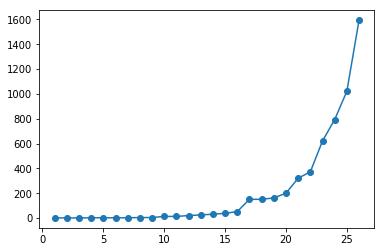

In [8]:
x = dfBrazil.Day
y = dfBrazil.Cases
plt.plot(x, y, '-o')
plt.show()

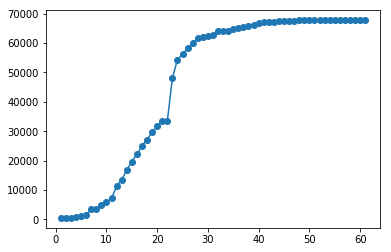

In [9]:
x = dfChina.Day
y = dfChina.Cases
plt.plot(x, y, '-o')
plt.show()

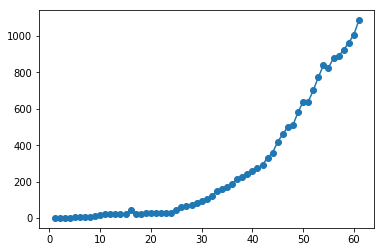

In [10]:
x = dfJapan.Day
y = dfJapan.Cases
plt.plot(x, y, '-o')
plt.show()

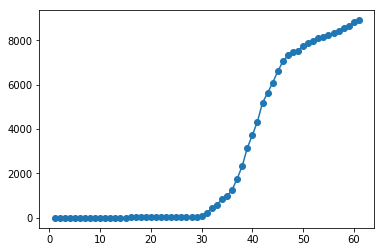

In [11]:
x = dfSouthKorea.Day
y = dfSouthKorea.Cases
plt.plot(x, y, '-o')
plt.show()

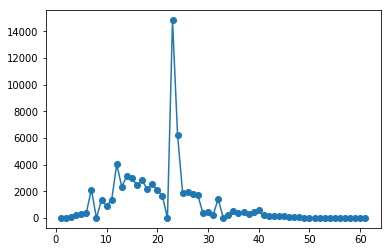

In [12]:
x = dfChina.Day
y = dfChina.Contagious
plt.plot(x, y, '-o')
plt.show()

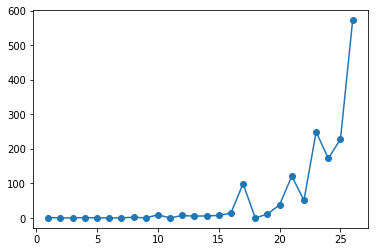

In [13]:
x = dfBrazil.Day
y = dfBrazil.Contagious
plt.plot(x, y, '-o')
plt.show()

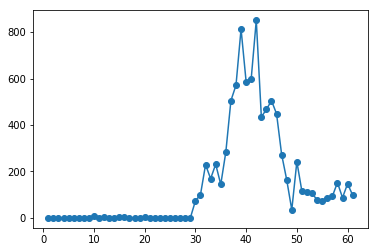

In [14]:
x = dfSouthKorea.Day
y = dfSouthKorea.Contagious
plt.plot(x, y, '-o')
plt.show()

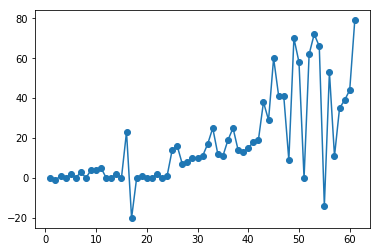

In [15]:
x = dfJapan.Day
y = dfJapan.Contagious
plt.plot(x, y, '-o')
plt.show()

In [16]:
def calc_stable_day(df):
    df = contagious_dataframe(df)
    
    percentualContagious = []
    stable_final_day = None
    flag_break_stable_day = 0
    stable_final_day = None
    
    for x in range(df.shape[0]):
        percentual_day = (df.iloc[x].Contagious*100)/df.max().Contagious
        percentualContagious.append(percentual_day)
    
    
    for i in range(len(percentualContagious)):
        if int(percentualContagious[i]) == 100:
            flag_break_stable_day = flag_break_stable_day+1
        if flag_break_stable_day == 1 and int(percentualContagious[i]) == 0:
            flag_break_stable_day = flag_break_stable_day+1
        if flag_break_stable_day == 2:
            stable_final_day = i+1
            break
    
    
    return stable_final_day

In [17]:
days_to_stable_day = int(calc_stable_day(dfChina)+(calc_stable_day(dfChina)*0.3))

In [25]:
def normatization_for_stable_days(df, stable_total_days):
    days = []
    cases = []
    dates = []
    deaths = []
    recovereds = []
    contagious = []
    for i in range(stable_total_days):
        days.append(i+1)
        if i < df.shape[0]:
            cases.append(df.iloc[i].Cases)
            datetime_object = datetime.strptime(str(df.iloc[i].Date), '%Y-%m-%d %H:%M:%S')
            dates.append(datetime_object)
            deaths.append(df.iloc[i].Deaths)
            recovereds.append(df.iloc[i].Recovered)
            contagious.append(df.iloc[i].Contagious)
            last_date = datetime_object
        else:
            last_date = (last_date+timedelta(days=1))
            cases.append(None)
            dates.append(last_date)
            deaths.append(None)
            recovereds.append(None)
            contagious.append(None)
    df = pd.DataFrame({"Date":dates, "Day":days, "Cases": cases, "Deaths": deaths, "Recovered": recovereds, "Contagious": contagious})
    return df

    

In [26]:
dfNormDaysBrazil = normatization_for_stable_days(dfBrazil, days_to_stable_day)
dfNormDaysBrazil

,Date,Day,Cases,Deaths,Recovered,Contagious
0,2020-02-26,1,1.0,0.0,0.0,1.0
1,2020-02-27,2,1.0,0.0,0.0,0.0
2,2020-02-28,3,1.0,0.0,0.0,0.0
3,2020-02-29,4,2.0,0.0,0.0,1.0
4,2020-03-01,5,2.0,0.0,0.0,0.0
5,2020-03-02,6,2.0,0.0,0.0,0.0
6,2020-03-03,7,2.0,0.0,0.0,0.0
7,2020-03-04,8,4.0,0.0,0.0,2.0
8,2020-03-05,9,4.0,0.0,0.0,0.0
9,2020-03-06,10,13.0,0.0,0.0,9.0


In [34]:
dfNormDaysBrazil.to_csv(r'brazil_data.csv', index=False)

In [35]:
dfChina.to_csv(r'china_data.csv', index=False)
dfJapan.to_csv(r'japan_data.csv', index=False)
dfSouthKorea.to_csv(r'south_korea_data.csv', index=False)

In [33]:
normatization_for_stable_days(dfJapan, days_to_stable_day)

,Date,Day,Cases,Deaths,Recovered,Contagious
0,2020-01-22,1,2,0,0,0
1,2020-01-23,2,1,0,0,-1
2,2020-01-24,3,2,0,0,1
3,2020-01-25,4,2,0,0,0
4,2020-01-26,5,4,0,1,2
5,2020-01-27,6,4,0,1,0
6,2020-01-28,7,7,0,1,3
7,2020-01-29,8,7,0,1,0
8,2020-01-30,9,11,0,1,4
9,2020-01-31,10,15,0,1,4
